# Creating the dataset from Barnabe 2011

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

### Loading the data

In [49]:
data = np.loadtxt('./raw_data/Barnabe_2011.txt', delimiter=',',usecols=[4,5,6], skiprows = 1)
GalaxyNamesvalues = np.loadtxt('./raw_data/Barnabe_2011.txt', usecols=[0],delimiter=',' ,dtype='str', skiprows = 1)
datasup = pd.read_csv('./raw_data/Auger_2009.csv').to_numpy()
GalaxyNames_Auger09 = datasup[:,0]
GalaxyNames = []

for i in range(len(GalaxyNamesvalues)):
    if str(GalaxyNamesvalues[i])[9] == '+':
        GalaxyNames.append(str(GalaxyNamesvalues[i])[4:])
    else:
        GalaxyNames.append(str(GalaxyNamesvalues[i])[4:9]+'-'+str(GalaxyNamesvalues[i])[10:])
        
        
        

# We cross match to retrieve stellar masses
_, _, indx_Aug = np.intersect1d(GalaxyNames, GalaxyNames_Auger09, assume_unique=True, return_indices=True,)


In [50]:
logML = datasup[indx_Aug,2] # logMstellar [Msun] - IMF:Chabrier
M = 10**(logML) #Mstellar [Msun]
fDM = data[:,0]
higherror = data[:,1]
lowerror = np.abs(data[:,2])
error = np.array([lowerror,higherror])
print(len(M), len(fDM))
# Cross match with https://ui.adsabs.harvard.edu/abs/2008ApJ...682..964B/abstract to get effective radii

Reff = np.array([2.19,2.67,3.87,4.25,1.39,1.47,1.81,2.48,1.98,2.33,1.83,3.28,4.11,0.89,0.94,2.61])

16 16


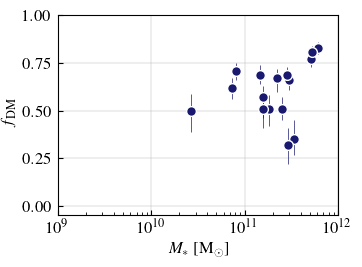

In [51]:
#################
# Plot parameters
params = {
    "font.size": 12,
    "font.family": "Times",
    "text.usetex": True,
    "figure.figsize": (4, 2.5),
    "figure.subplot.left": 0.25,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.15,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.35,
    "figure.subplot.hspace": 0.35,
    "lines.markersize": 2,
    "lines.linewidth": 1.5,
}
plt.rcParams.update(params)
plt.figure()
ax = plt.subplot(1, 1, 1)
plt.grid(linestyle='-', linewidth=0.3)

plt.errorbar(M, fDM, yerr=error, marker='o', markersize=7, markeredgecolor="white", 
             ls='none', lw=0.5, c='midnightblue')

plt.axis([1e9, 1e12, -0.05, 1])
plt.xscale('log')
plt.ylabel(r"$f_{\mathrm{DM}}$")
plt.xlabel("$M_{*}$ [M$_{\odot}$]")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)
plt.show()

### Making the final csv file

In [52]:
# Writing the data into a CSV file
with open('dataset/BARNABE11.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Writing the name line and the unit line
    writer.writerow([ "Name","Mstellar[Msun]","fDM(Reff)", "+ErrorfDM", "-ErrorfDM", "Reff[kpc]"])

    # Looping through each element of the data
    for i in range(len(M)):
        Name = GalaxyNames[i]
        Mass = M[i]
        fDMeff = fDM[i]
        psigma_fdmeff = higherror[i]
        msigma_fdmeff = lowerror[i]
        R = Reff[i]
        # Writing the data into the CSV file
        writer.writerow([ Name, Mass, fDMeff, psigma_fdmeff, msigma_fdmeff, R])
        

In [53]:
# Reading the CSV file into a DataFrame
barnabe = pd.read_csv('dataset/BARNABE11.csv')
barnabe

,Name,Mstellar[Msun],fDM(Reff),+ErrorfDM,-ErrorfDM,Reff[kpc]
0,J0037-0942,3.019952e+11,0.66,0.04,0.05,2.19
1,J0216-0813,6.165950e+11,0.83,0.03,0.03,2.67
2,J0912+0029,5.128614e+11,0.77,0.03,0.04,3.87
3,J0935-0003,5.248075e+11,0.81,0.03,0.03,4.25
4,J0959+0410,8.128305e+10,0.71,0.04,0.05,1.39
5,J1204+0358,1.584893e+11,0.57,0.06,0.11,1.47
6,J1250+0523,3.388442e+11,0.35,0.10,0.08,1.81
7,J1451-0239,1.819701e+11,0.51,0.07,0.09,2.48
8,J1627-0053,2.691535e+10,0.50,0.09,0.11,1.98
9,J2238-0754,7.413102e+10,0.62,0.05,0.06,2.33
